In [1]:
from tensorflow import keras
import tensorflow as tf
from lib.utils import model, gan, build
import matplotlib.pyplot as plt

# Descending Cifar10 models with stanh activation

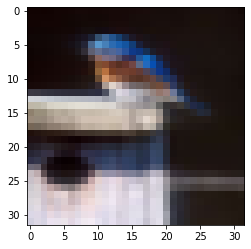

In [2]:
(x,y), (_,_) = keras.datasets.cifar10.load_data()
dataset = x[y.flatten() == 2]
plt.imshow((dataset).astype('int32')[1])
dataset = dataset.reshape((dataset.shape[0],)+ (32,32,3)) .astype('float32') /127.5 - 1.0

In [3]:
res = 32
channel = 3
# Preprocessing data with custom function
batch_size = 64
img_shape = (res,res,channel)
epochs = 200
latent_dim = 100
n_images = 16
s = tf.random.normal([n_images, latent_dim])
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
image_dir = "../../../oDig/cifar/desc/tanh/"
checkpoint_dir = '../../../checkpoints/cifar_checkpoints/desc/tanh/'
image_freq = 50
checkpoint_freq =200
d_optimizer = build.d_optimizer(0.0002)
g_optimizer = build.g_optimizer(0.0002)

2022-04-08 11:43:27.406848: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 11:43:27.416699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 11:43:27.417072: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 11:43:27.417802: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
name = 'Model_1-Tanh'
model1 = model.ModelSettings(model_name=name,
                              gen_filter=5,
                              disc_filter=5,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen1, disc1 = model.build(model1)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 4096)              413696    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 32)       32800     
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 32)        0         
                                                         

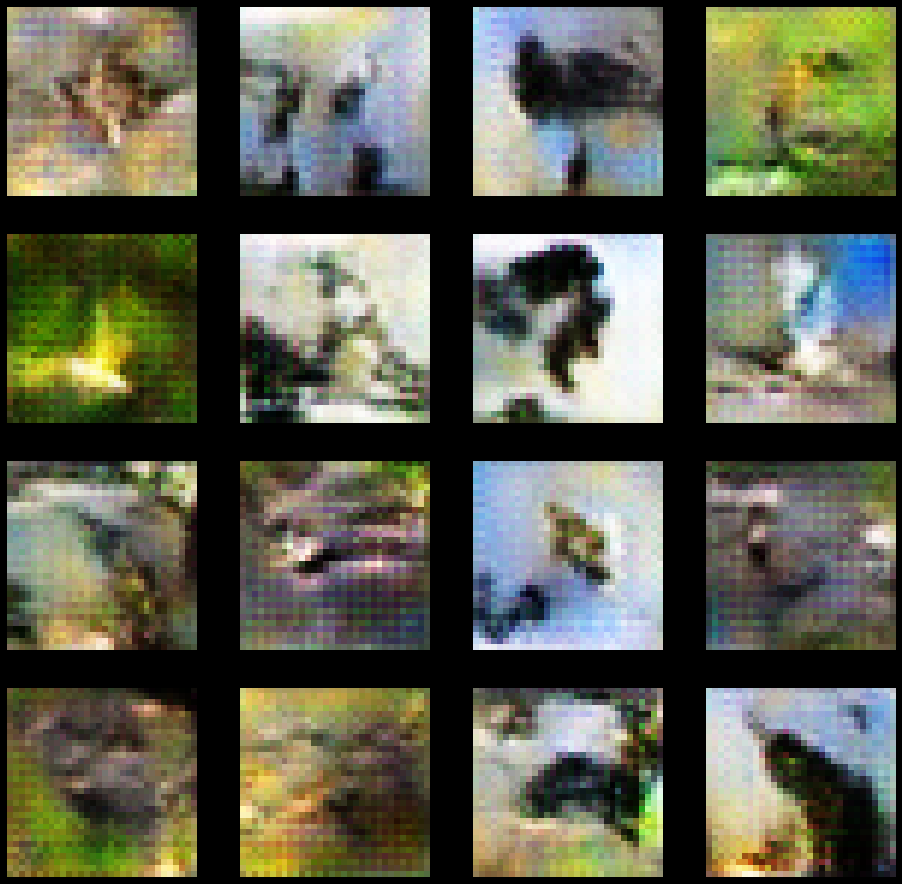

None
157/157 [==============================] - 1s 9ms/step - d_loss: 0.6898 - g_loss: 0.6654


In [5]:
g = gan.GAN(g=gen1, d=disc1, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [6]:
name = 'Model_2-Tanh'
model2 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen2, disc2 = model.build(model2)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 16, 16, 64)       131136    
 ranspose)                                                       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                         

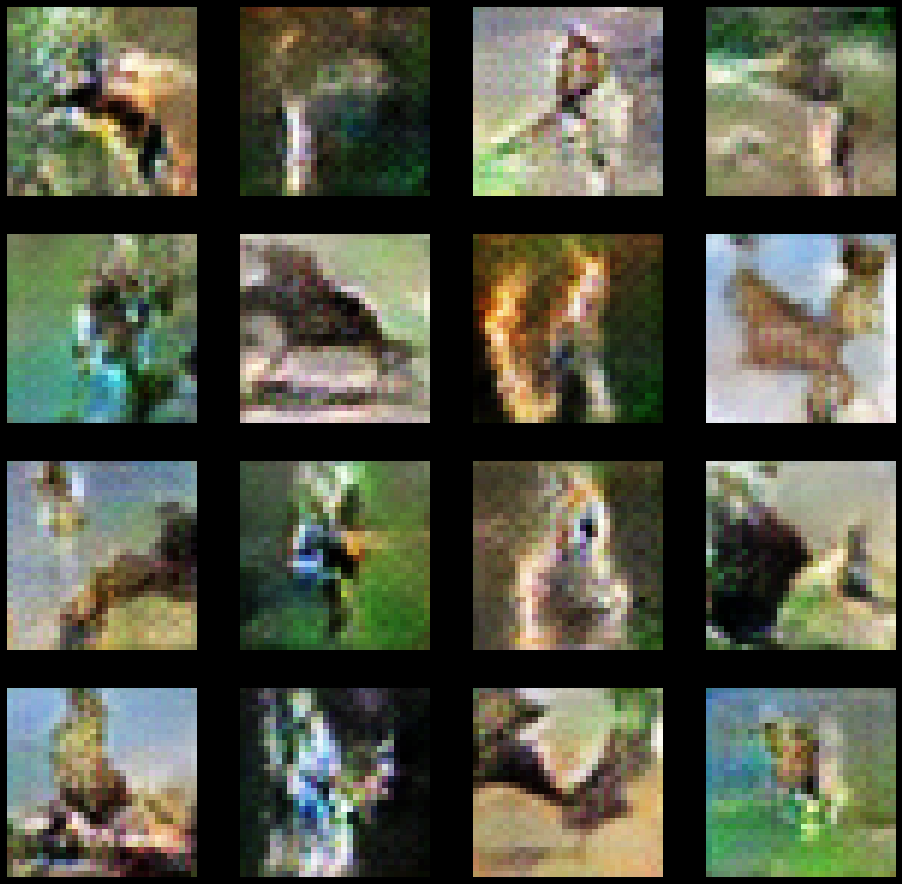

None
157/157 [==============================] - 1s 9ms/step - d_loss: 0.6925 - g_loss: 0.6589


In [7]:
g = gan.GAN(g=gen2, d=disc2, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [8]:
name = 'Model_3-Tanh'
model3 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen3, disc3 = model.build(model3)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 16384)             1654784   
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

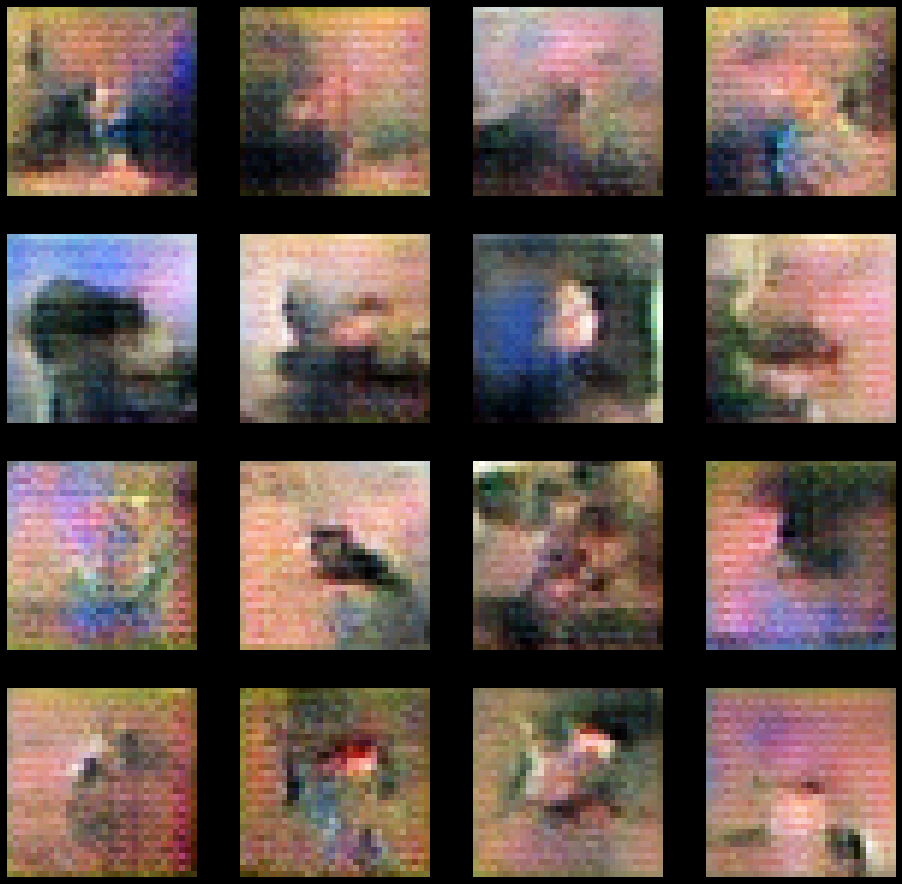

None
157/157 [==============================] - 2s 16ms/step - d_loss: 0.6928 - g_loss: 0.6474


In [9]:
g = gan.GAN(g=gen3, d=disc3, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [10]:
name = 'Model_4-Tanh'
model4 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen4, disc4 = model.build(model4)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 16384)             1654784   
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_3 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 16, 16, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

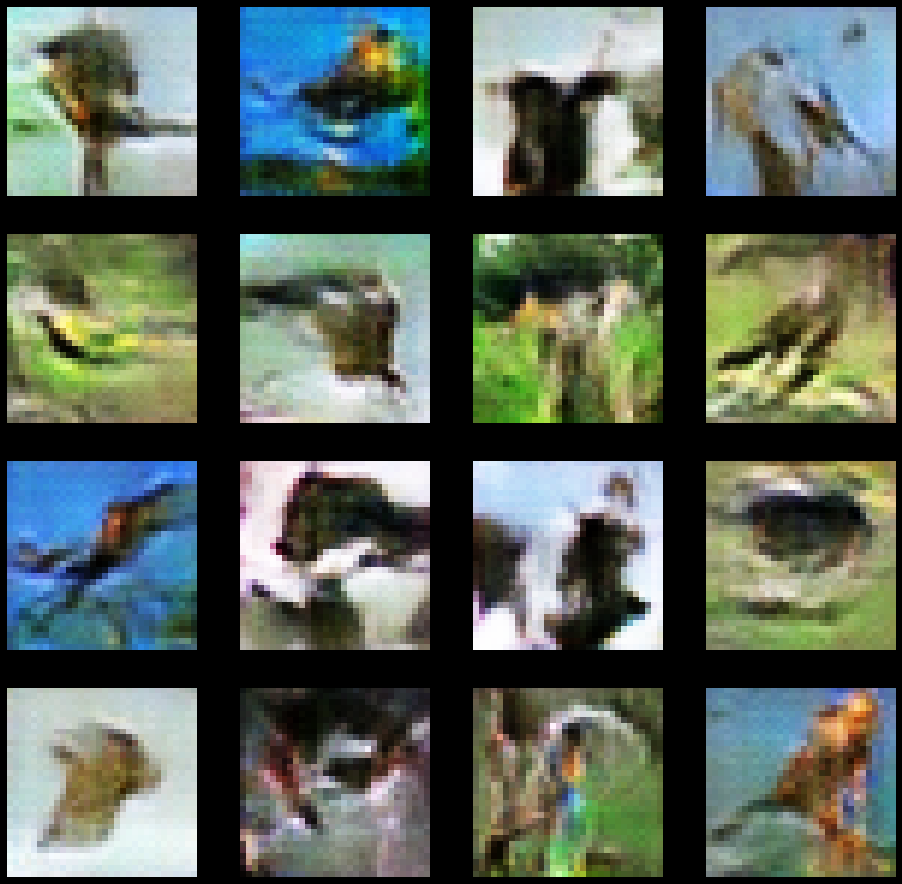

None
157/157 [==============================] - 3s 16ms/step - d_loss: 0.6897 - g_loss: 0.6634


In [11]:
g = gan.GAN(g=gen4, d=disc4, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [12]:
name = 'Model_5-Tanh'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen5, disc5 = model.build(model5)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_8 (Dense)             (None, 16384)             1654784   
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_4 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

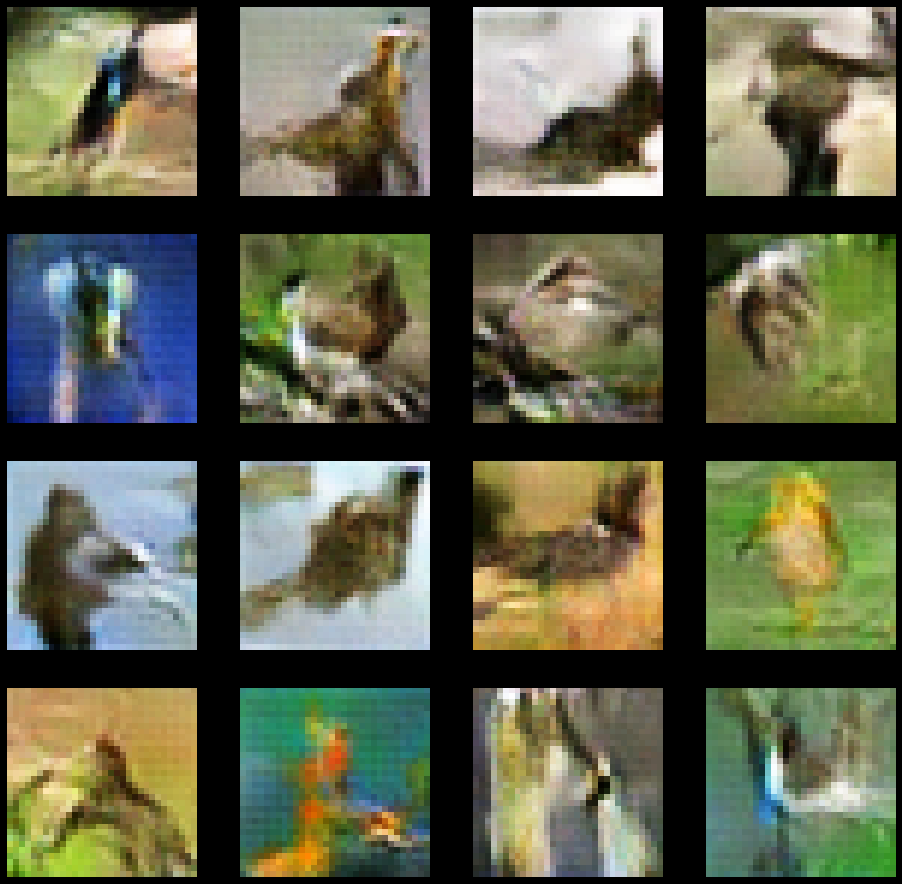

None
157/157 [==============================] - 3s 21ms/step - d_loss: 0.6494 - g_loss: 0.7904


In [13]:
g = gan.GAN(g=gen5, d=disc5, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [4]:
name = 'Model_6-Tanh'
model6 = model.ModelSettings(model_name=name,
                              gen_filter=5,
                              disc_filter=5,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen6, disc6 = model.build(model6)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 4096)              413696    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 32)       32800     
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 32)        0         
                                                         

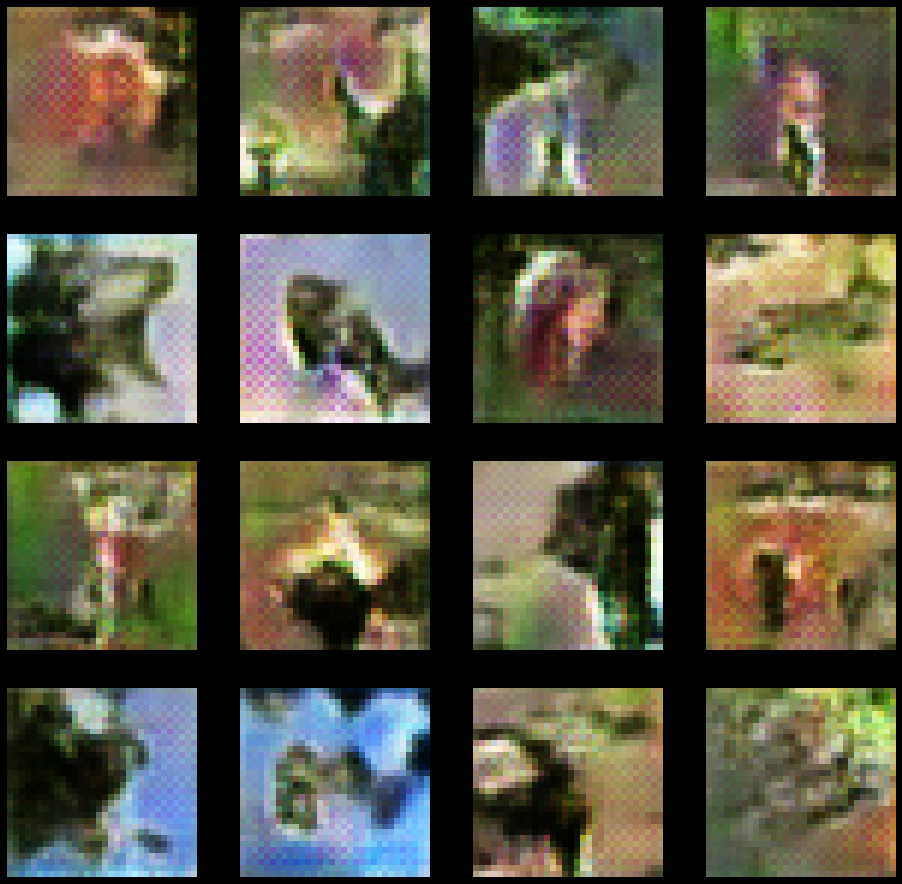

None
157/157 [==============================] - 1s 8ms/step - d_loss: 0.6882 - g_loss: 0.6576


In [5]:
g = gan.GAN(g=gen6, d=disc6, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [6]:
name = 'Model_7-Tanh'
model7 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen7, disc7 = model.build(model7)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 16, 16, 64)       131136    
 ranspose)                                                       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                         

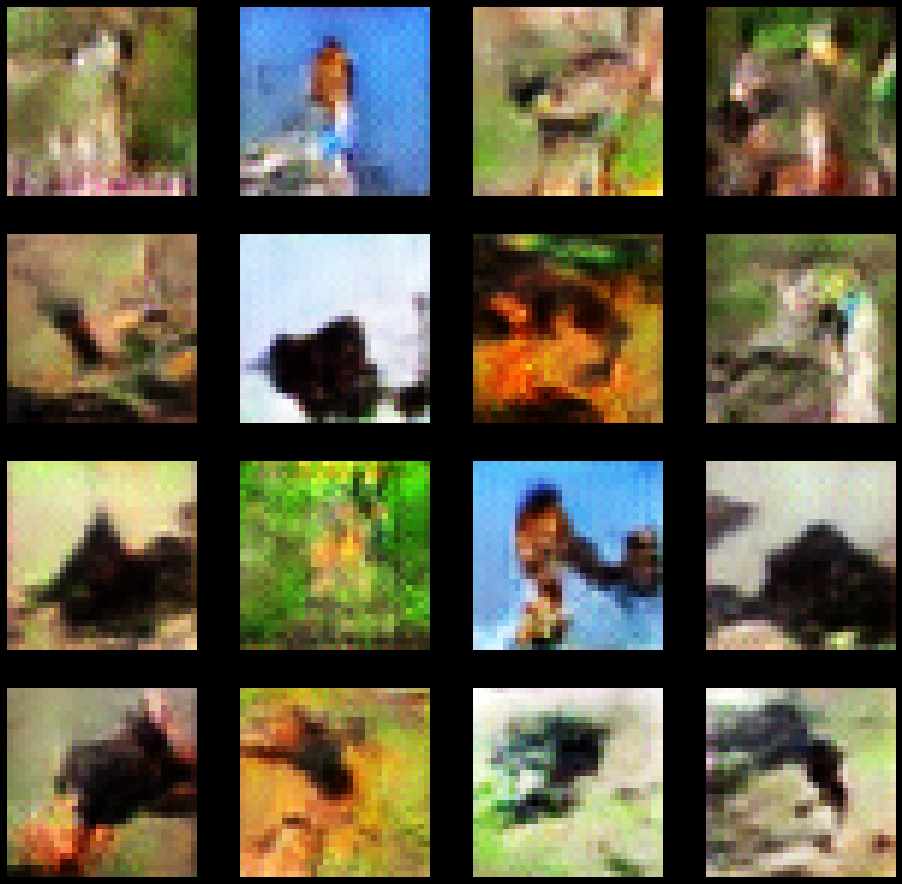

None
157/157 [==============================] - 2s 10ms/step - d_loss: 0.6919 - g_loss: 0.6582


In [7]:
g = gan.GAN(g=gen7, d=disc7, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [8]:
name = 'Model_8-Tanh'
model8 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen8, disc8 = model.build(model8)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 16384)             1654784   
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

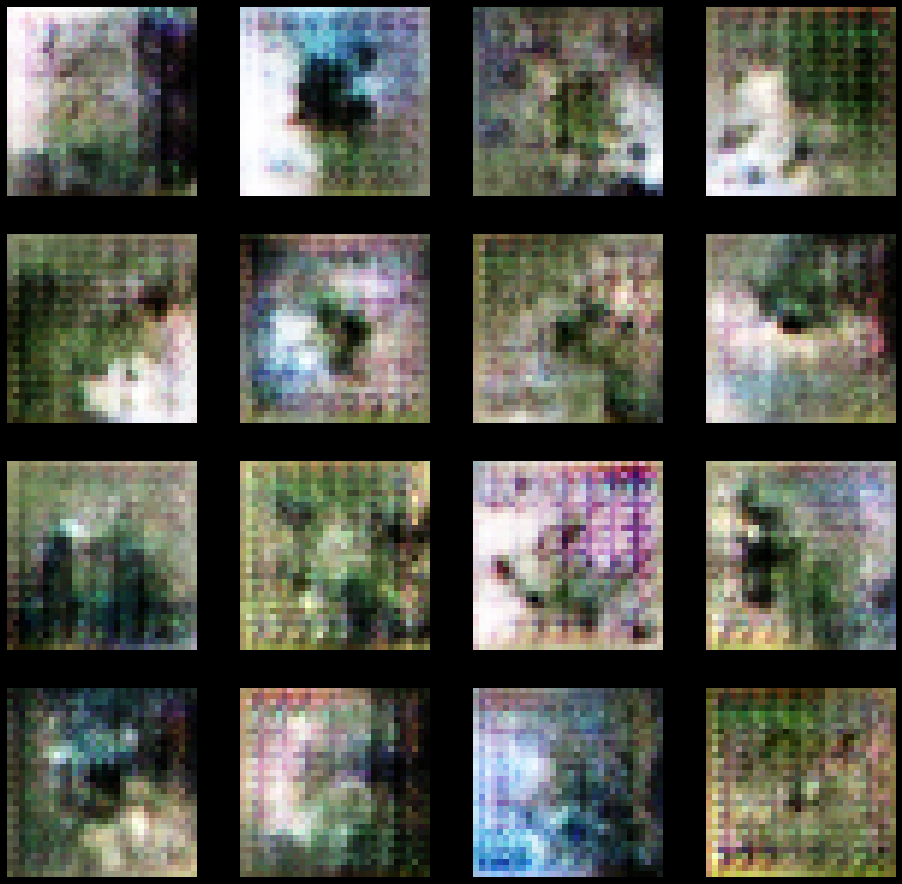

None
157/157 [==============================] - 3s 17ms/step - d_loss: 0.6925 - g_loss: 0.6483


In [9]:
g = gan.GAN(g=gen8, d=disc8, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [10]:
name = 'Model_9-Tanh'
model9 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen9, disc9 = model.build(model9)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 16384)             1654784   
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_3 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 16, 16, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

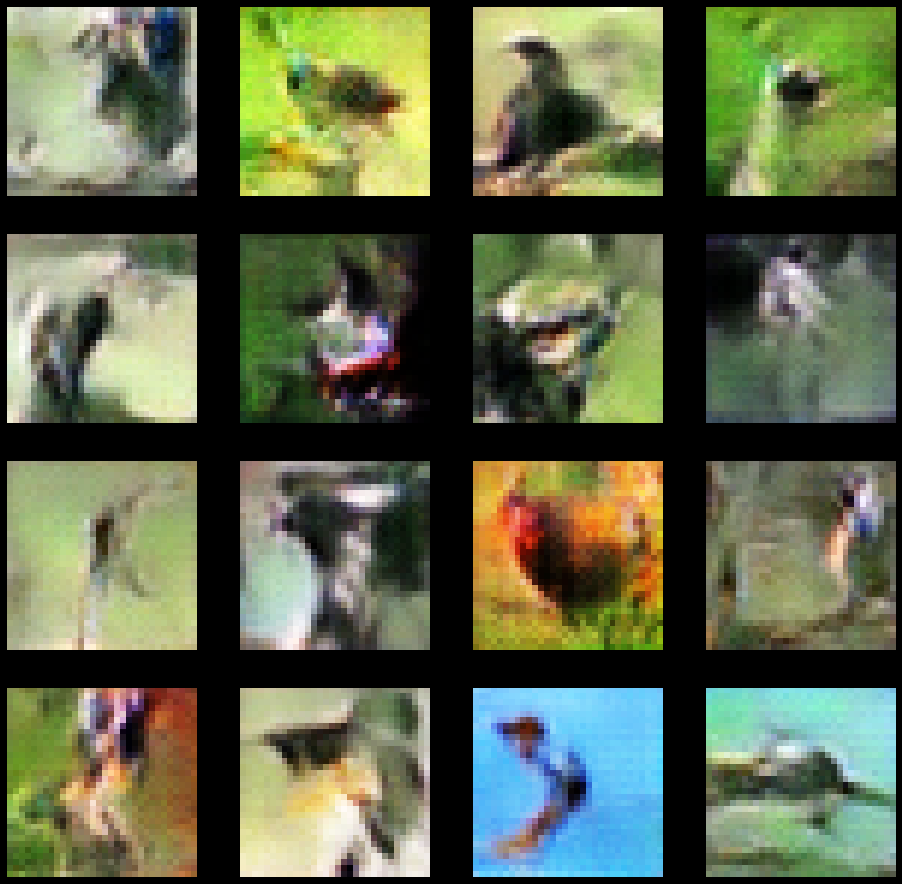

None
157/157 [==============================] - 3s 17ms/step - d_loss: 0.6901 - g_loss: 0.6638


In [11]:
g = gan.GAN(g=gen9, d=disc9, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [12]:
name = 'Model_10-Tanh'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=False,
                              is_tanh=True
                              )
gen10, disc10 = model.build(model10)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_8 (Dense)             (None, 16384)             1654784   
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_4 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

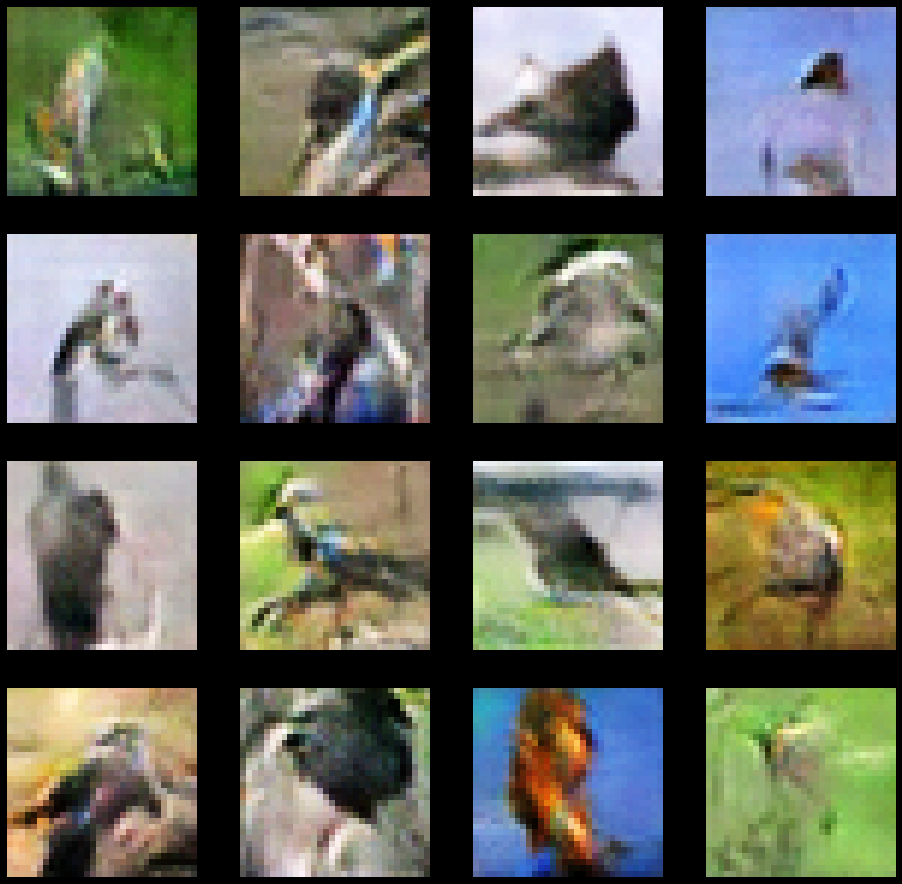

None
157/157 [==============================] - 3s 21ms/step - d_loss: 0.6559 - g_loss: 0.7746


In [13]:
g = gan.GAN(g=gen10, d=disc10, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [24]:
name = 'Model_11-Tanh-Norm'
model1 = model.ModelSettings(model_name=name,
                              gen_filter=5,
                              disc_filter=5,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen1, disc1 = model.build(model1)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_20 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_10 (Reshape)        (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_30 (Conv2D  (None, 16, 16, 32)       32800     
 Transpose)                                                      
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 16, 16, 32)        0         
                                                         

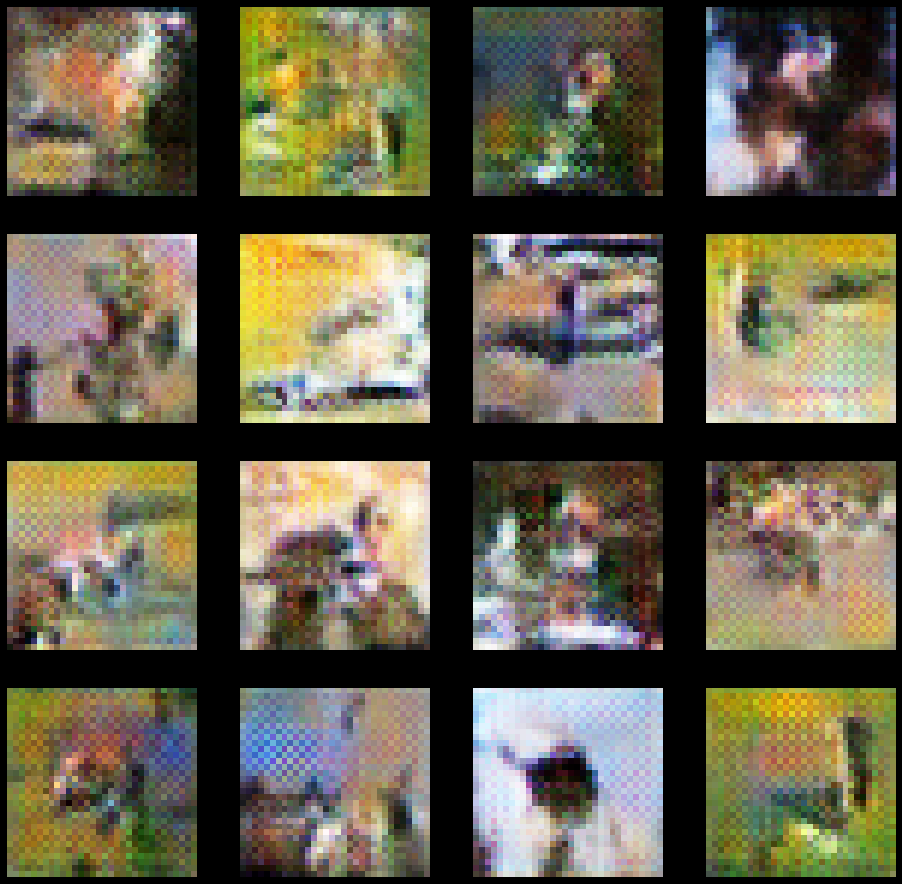

None
157/157 [==============================] - 1s 8ms/step - d_loss: 0.6931 - g_loss: 0.6542


In [25]:
g = gan.GAN(g=gen1, d=disc1, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [26]:
name = 'Model_12-Tanh-Norm'
model2 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen2, disc2 = model.build(model2)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_22 (Dense)            (None, 8192)              827392    
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_11 (Reshape)        (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_33 (Conv2D  (None, 16, 16, 64)       131136    
 Transpose)                                                      
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                         

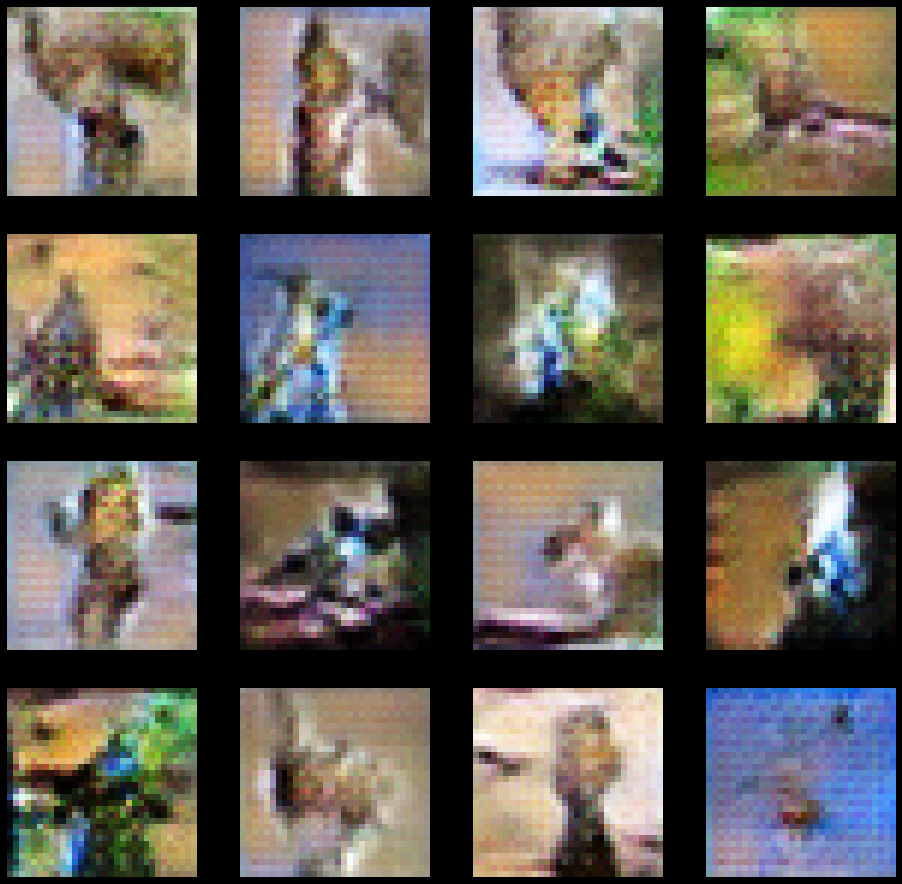

None
157/157 [==============================] - 2s 10ms/step - d_loss: 0.6913 - g_loss: 0.6614


In [27]:
g = gan.GAN(g=gen2, d=disc2, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [28]:
name = 'Model_13-Tanh-Norm'
model3 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen3, disc3 = model.build(model3)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_24 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_62 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_12 (Reshape)        (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_36 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

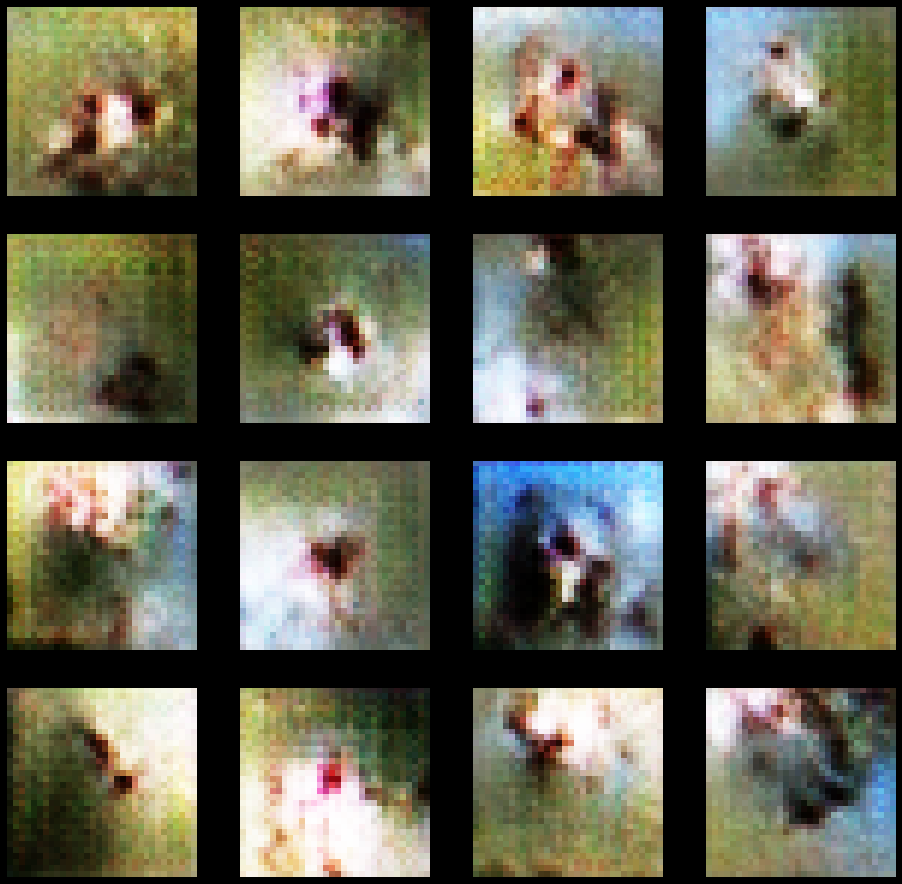

None
157/157 [==============================] - 3s 16ms/step - d_loss: 0.6921 - g_loss: 0.6448


In [29]:
g = gan.GAN(g=gen3, d=disc3, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [30]:
name = 'Model_14-Tanh-Norm'
model4 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen4, disc4 = model.build(model4)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_26 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_67 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_13 (Reshape)        (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_39 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_65 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

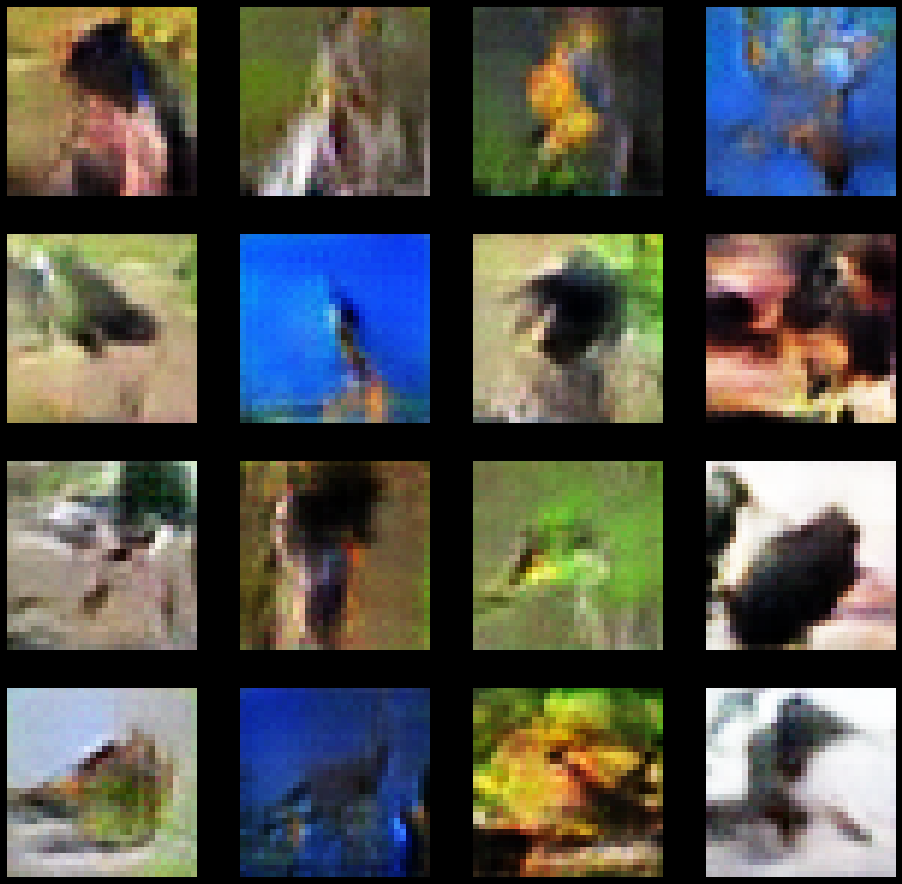

None
157/157 [==============================] - 3s 17ms/step - d_loss: 0.6891 - g_loss: 0.6620


In [31]:
g = gan.GAN(g=gen4, d=disc4, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [32]:
name = 'Model_15-Tanh-Norm'
model5 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen5, disc5 = model.build(model5)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_28 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_72 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_14 (Reshape)        (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_42 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_70 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

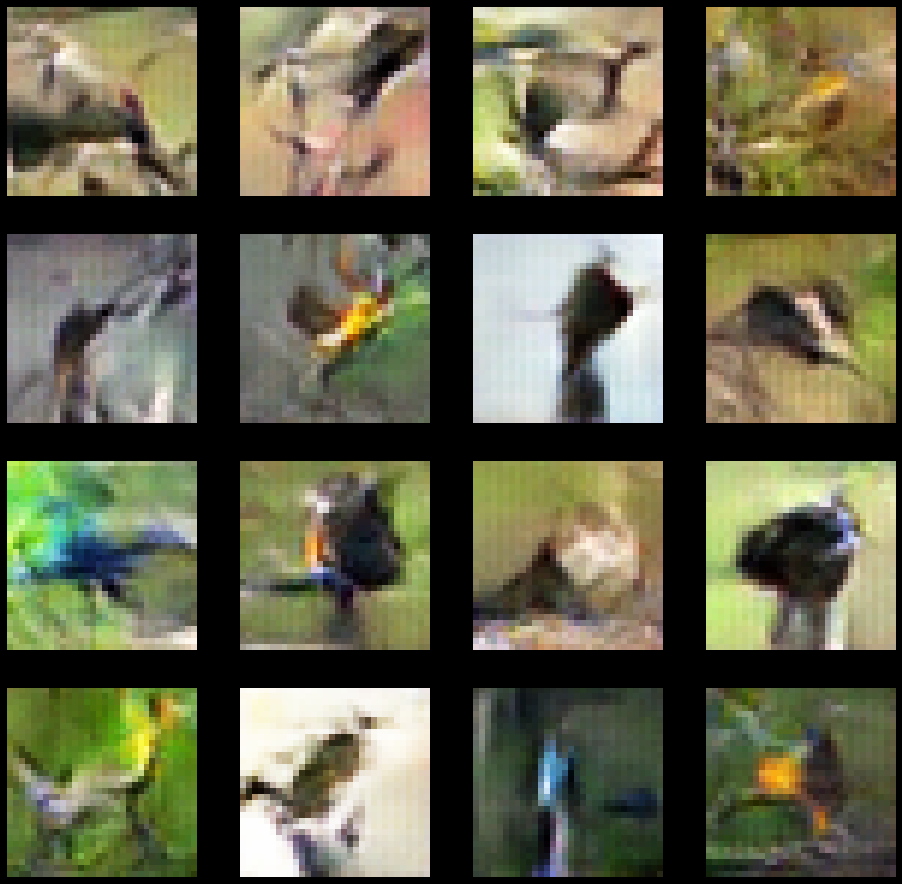

None
157/157 [==============================] - 4s 25ms/step - d_loss: 0.6553 - g_loss: 0.7700


In [33]:
g = gan.GAN(g=gen5, d=disc5, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [14]:
name = 'Model_16-Tanh-Norm'
model6 = model.ModelSettings(model_name=name,
                              gen_filter=5,
                              disc_filter=5,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen6, disc6 = model.build(model6)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_10 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_5 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 16, 16, 32)       32800     
 Transpose)                                                      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 16, 16, 32)        0         
                                                         

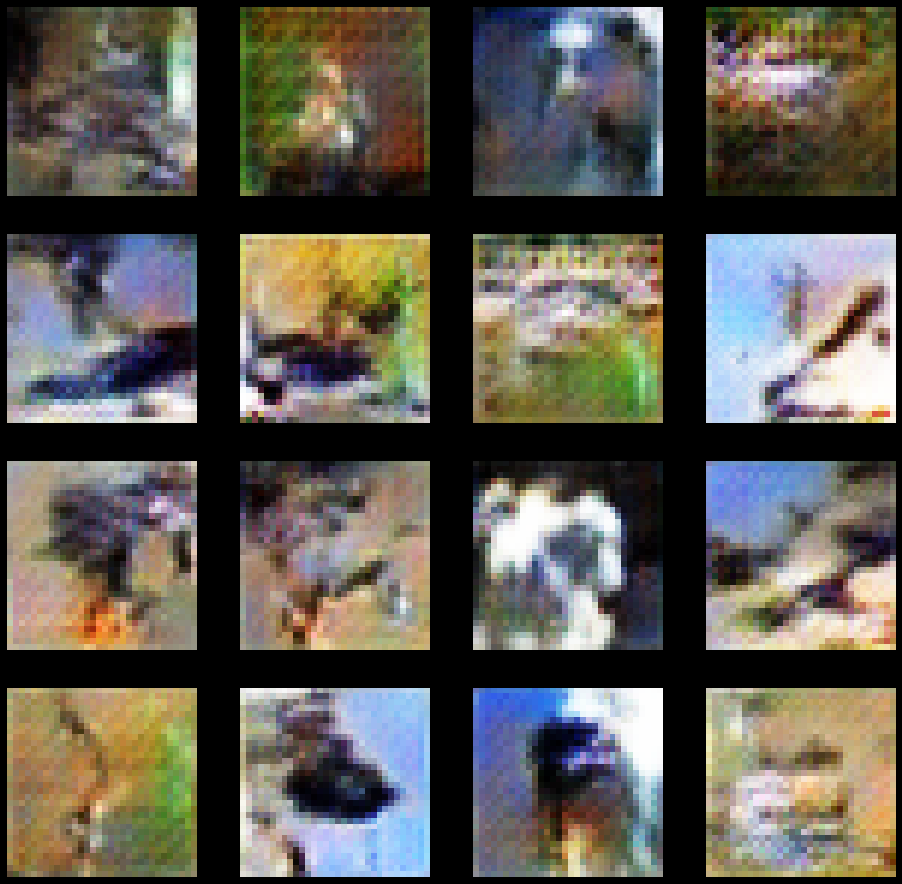

None
157/157 [==============================] - 1s 9ms/step - d_loss: 0.6896 - g_loss: 0.6620


In [15]:
g = gan.GAN(g=gen6, d=disc6, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [16]:
name = 'Model_17-Tanh-Norm'
model7 = model.ModelSettings(model_name=name,
                              gen_filter=6,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen7, disc7 = model.build(model7)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_12 (Dense)            (None, 8192)              827392    
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_6 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 16, 16, 64)       131136    
 Transpose)                                                      
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                         

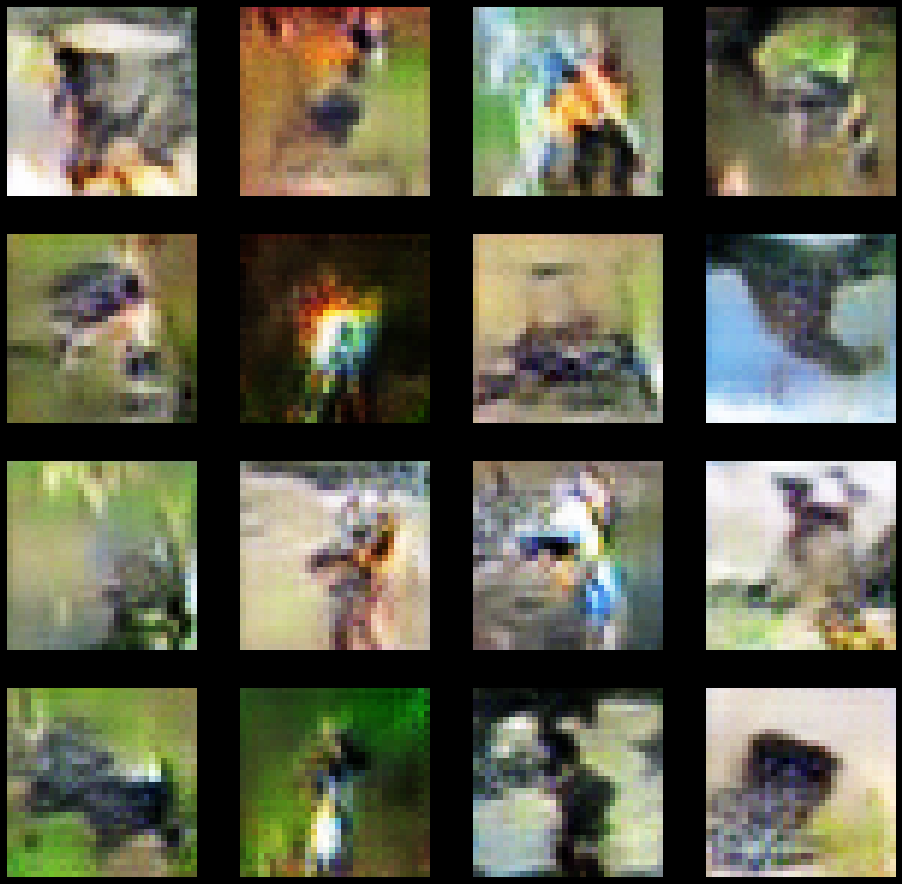

None
157/157 [==============================] - 2s 11ms/step - d_loss: 0.6884 - g_loss: 0.6614


In [17]:
g = gan.GAN(g=gen7, d=disc7, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [18]:
name = 'Model_18-Tanh-Norm'
model8 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=6,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen8, disc8 = model.build(model8)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_14 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_7 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

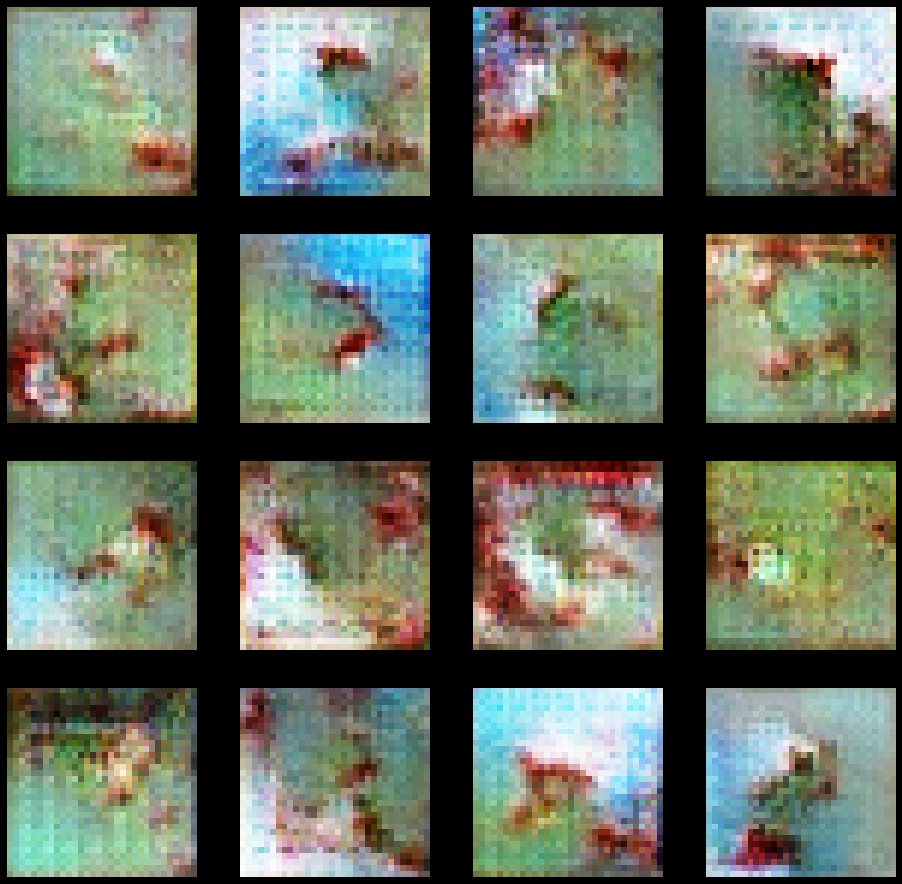

None
157/157 [==============================] - 3s 18ms/step - d_loss: 0.6931 - g_loss: 0.6484


In [19]:
g = gan.GAN(g=gen8, d=disc8, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [20]:
name = 'Model_19-Tanh-Norm'
model9 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=7,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen9, disc9 = model.build(model9)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_16 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_42 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_8 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_24 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

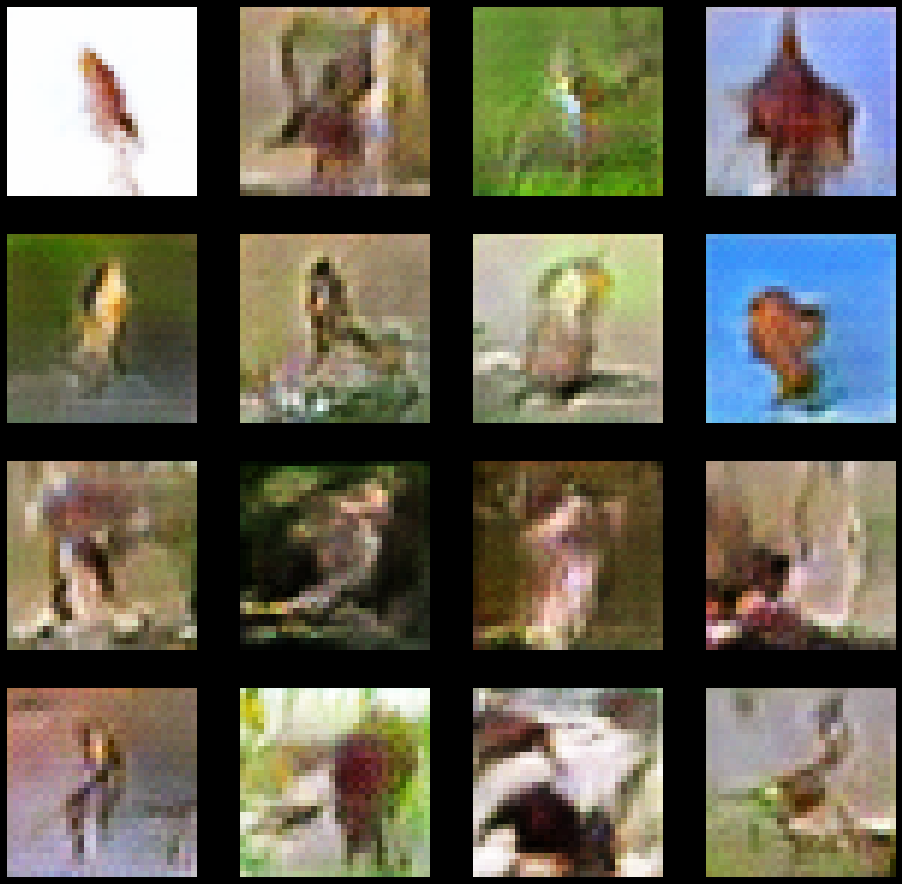

None
157/157 [==============================] - 3s 17ms/step - d_loss: 0.6895 - g_loss: 0.6648


In [21]:
g = gan.GAN(g=gen9, d=disc9, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [22]:
name = 'Model_20-Tanh-Norm'
model10 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=8,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=True,
                              is_batchnorm=True,
                              is_tanh=True
                              )
gen10, disc10 = model.build(model10)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_18 (Dense)            (None, 16384)             1654784   
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_9 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_27 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                         

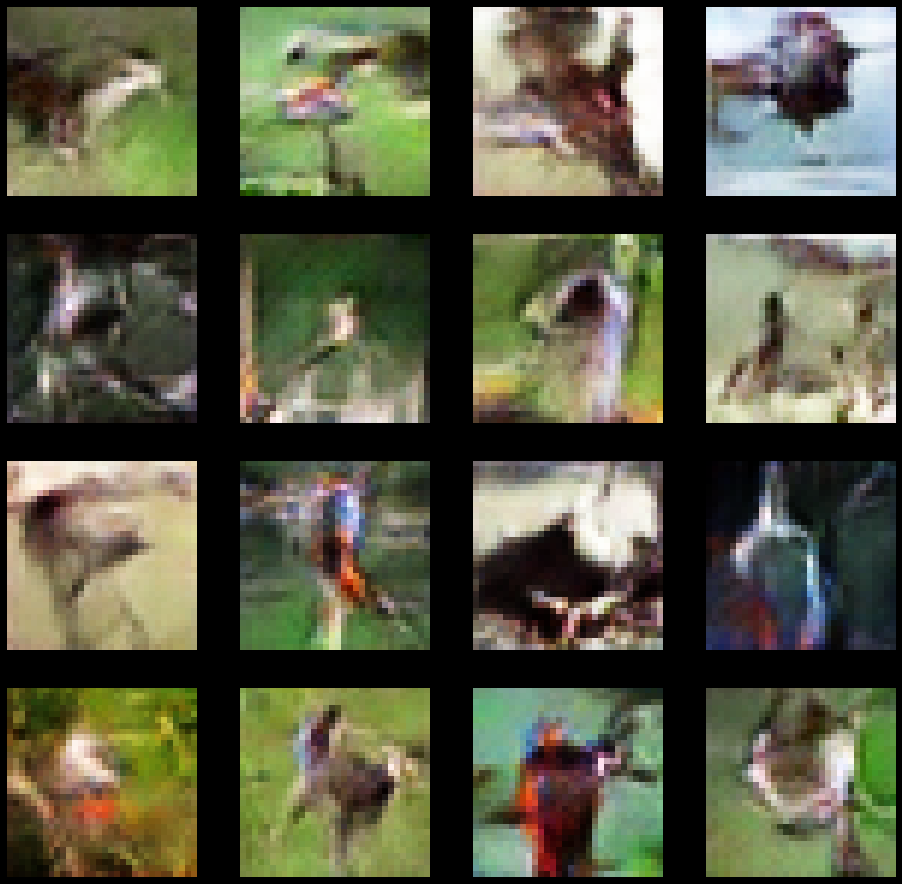

None
157/157 [==============================] - 4s 24ms/step - d_loss: 0.6507 - g_loss: 0.8046


In [23]:
g = gan.GAN(g=gen10, d=disc10, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs,
      callbacks=[gan.GANCallback(num_img=n_images, iFreq=image_freq, seed=s, loc=image_dir, name=name)])